# Previsão de compra dos cursos

---

**Empresa Ficticia**

### Data Cursos Online

O Data Cursos Online é uma plataforma que visa conectar estudantes, profissionais e mestres do conhecimento em um único ambiente.

Contamos com uma equipe qualificada de profissionais da área da educação que avaliam toda a plataforma e cursos a fim de auxiliar alunos a obterem uma experiência realmente construtiva e enriquecedora em cada um de seus cursos.

## Checklist das Etapas

1. Definindo o problema.
2. Captação dos dados.
3. Análise exploratória dos dados.
4. Preparação dos dados.
5. Construção do modelo de Machine Learning.
6. Avaliação do modelo.

## 1. Definindo o problema.

A Data Cursos Online observou um crescente numero de novos concorrentes na internet, todos com métodos, marketing e propostas diferentes e inovadoras. A empresa, já possui um grande número de usuários mas teme a perda de uma parte para essas novas plataformas. Por isso decidiu investir em duas frentes: Na manutenção dos usuários antigos e na captação de novos.

Através de um banco de dados disponibilizado, conseguimos observar algumas características de usuários que visitam o site da empresa e através dele queremos entender bem o perfil dos compradores e não compradores.


### Objetivo

Através do banco de dados, criar um modelo de Machine Learning com o propósito de tentar prever a futura compra ou não do usuário a partir de algumas variáveis registradas.

Essas variáveis são computadas quando o usuário acessa no site, navega nas páginas, busca por algum produto e se comprou.

## 2. Caletando os dados.

Dados disponibilizados pela Alura Cursos, que estão acessível [neste link](https://github.com/rodrigogaf01/prev-compra-curso/blob/main/datacurso.csv).

In [1]:
# Bibliotecas excenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Machine Learning
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import pickle

# Simulador
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

In [2]:
# Importando os dados
dados= pd.read_csv('datacurso.csv')
dados.head()


,home,busca,logado,comprou
0,0,algoritmos,1,1
1,0,java,0,1
2,1,algoritmos,0,1
3,1,ruby,1,0
4,1,ruby,0,1


In [3]:
print('Número de linhas: ', dados.shape[0])
print('Número de colunas: ', dados.shape[1])

Número de linhas:  1000
Número de colunas:  4


In [4]:
# Verificando os dados contidos na coluna 'busca'
dados.busca.unique()

array(['algoritmos', 'java', 'ruby'], dtype=object)

## 3. Análise exploratória dos dados

Na análise inicial, toda variável deve ser estudada. É importante analisar o nome, valores faltantes, presença de outliers e o tipo de distribuição.

Como o caso é de previsão da compra de um curso pelo usuário, a variável ```'comprou'``` será deficina como variavel alvo.

### Variáveis

* **home:** Mostra se o usuário acessou a página home do site.
* **busca:** Informa qual foi o curso buscado pelo usuário.
* **logado:** Informa se o usuário estava logado com a sua conta no site.
* **comprou:** Computa se foi feita a compra ou não do curso.

In [5]:
dados.describe()

,home,logado,comprou
count,1000.000000,1000.000000,1000.000000
mean,0.502000,0.509000,0.832000
std,0.500246,0.500169,0.374053
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [6]:
dados.dtypes

home        int64
busca      object
logado      int64
comprou     int64
dtype: object

In [7]:
# Verificação da existência de dados missing
dados.isna().sum()

home       0
busca      0
logado     0
comprou    0
dtype: int64

In [8]:
print('Contagem Comprou(1)/Não Comprou(0)')
print(dados.comprou.value_counts())
print('')
print('Porcentagem Comprou(1)/Não Comprou(0)')
print((dados.comprou.value_counts(normalize= True)*100).round(2))

Contagem Comprou(1)/Não Comprou(0)
1    832
0    168
Name: comprou, dtype: int64

Porcentagem Comprou(1)/Não Comprou(0)
1    83.2
0    16.8
Name: comprou, dtype: float64


In [9]:
print('Contagem Acesso ao Home: Sim(1)/Não(0)')
print(dados.home.value_counts())
print('')
print('Porcentagem Acesso ao Home: Sim(1)/Não(0)')
print((dados.home.value_counts(normalize= True)*100).round(2))

Contagem Acesso ao Home: Sim(1)/Não(0)
1    502
0    498
Name: home, dtype: int64

Porcentagem Acesso ao Home: Sim(1)/Não(0)
1    50.2
0    49.8
Name: home, dtype: float64


In [10]:
print('Contagem Acesso Logado: Sim(1)/Não(0)')
print(dados.logado.value_counts())
print('')
print('Porcentagem Acesso Logado: Sim(1)/Não(0)')
print((dados.logado.value_counts(normalize= True)*100).round(2))

Contagem Acesso Logado: Sim(1)/Não(0)
1    509
0    491
Name: logado, dtype: int64

Porcentagem Acesso Logado: Sim(1)/Não(0)
1    50.9
0    49.1
Name: logado, dtype: float64


In [11]:
print('Contagem busca')
print(dados.busca.value_counts())
print('')
print('Porcentagem busca')
print((dados.busca.value_counts(normalize= True)*100).round(2))

Contagem busca
ruby          361
java          327
algoritmos    312
Name: busca, dtype: int64

Porcentagem busca
ruby          36.1
java          32.7
algoritmos    31.2
Name: busca, dtype: float64


In [12]:
display(dados.groupby('busca').comprou.value_counts().to_frame())
display((dados.groupby('busca').comprou.value_counts(normalize= True).to_frame()*100).round(2))

comprou
busca      comprou         
algoritmos 1            279
           0             33
java       1            327
ruby       1            226
           0            135

comprou
busca      comprou         
algoritmos 1          89.42
           0          10.58
java       1         100.00
ruby       1          62.60
           0          37.40

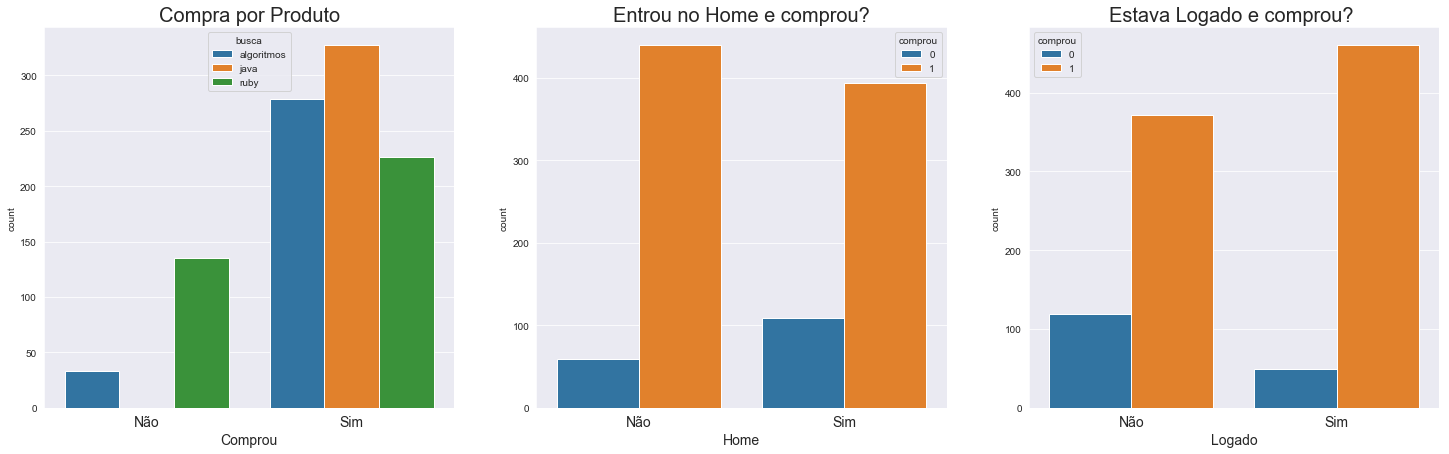

In [13]:
sns.set_style('darkgrid')
def count(titulo, x, xlabel,hue, dados):
    ax= sns.countplot(x= x, data= dados, hue= hue)
    ax.set_xticklabels(['Não', 'Sim'], fontsize= 14)
    ax.set_title(titulo, fontsize= 20)
    ax.figure.set_size_inches(25,7)
    ax.set_xlabel(xlabel, fontsize= 14)
    


plt.subplot(1, 3, 1)    
count('Compra por Produto', 'comprou','Comprou', 'busca', dados)

plt.subplot(1, 3, 2)
count('Entrou no Home e comprou?', 'home','Home', 'comprou', dados)

plt.subplot(1, 3, 3)
count('Estava Logado e comprou? ', 'logado','Logado', 'comprou', dados)

## Insights

- Não encontramos nenhuma anomalia. Todos os dados são 1 ou 0.
- Não possui valores missing.
- 83,2% das pessoas compraram algum curso.
- Todas as pessoas que procuraram por Java compraram o curso.

## 4. Preparação dos dados

### Selecionando as *features* e ajeitando o dataset

A coluna  ```['busca']``` precisa ser transformada em numérica para o modelo conseguir funcionar.

Após a transformação, as colunas selecionadas serão ```['home', 'logado', 'algoritmos', 'java', 'ruby']``` e será descartada a coluna ```['busca']``` pois não será mais relevante para o nosso modelo.

In [14]:
# Transformar a coluna busca em numérica usando get_dummies
dummies= dados.busca.str.get_dummies()
dados= pd.concat([dados, dummies], axis= 1)

# Excluindo a coluna busca que não sera utilizada
dados.drop(columns= ['busca'], inplace= True)

dados.head()

,home,logado,comprou,algoritmos,java,ruby
0,0,1,1,1,0,0
1,0,0,1,0,1,0
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,0,1,0,0,1


In [15]:
y= dados.comprou
x= dados[['home', 'logado', 'algoritmos', 'java', 'ruby']]
print(y.shape)
x.shape

(1000,)


(1000, 5)

### Valores Missing
Quando possuimos valores missing no dataset, nós podemos tratá-los de duas maneiras:
* Completar arbitrariamente (média, mediana, moda);
* Deletar a linha toda.

Como vimos no começo do projeto, o dataset não possui valores nulos, não sendo necessário qualquer tratamento.

### Matriz de Correlação

In [16]:
corr= dados.corr()
corr

,home,logado,comprou,algoritmos,java,ruby
home,1.000000,0.009930,-0.131941,-0.007010,-0.026237,0.032389
logado,0.009930,1.000000,0.195353,-0.012123,0.002375,0.009375
comprou,-0.131941,0.195353,1.000000,0.112091,0.313227,-0.414069
algoritmos,-0.007010,-0.012123,0.112091,1.000000,-0.469407,-0.506158
java,-0.026237,0.002375,0.313227,-0.469407,1.000000,-0.523925
ruby,0.032389,0.009375,-0.414069,-0.506158,-0.523925,1.000000


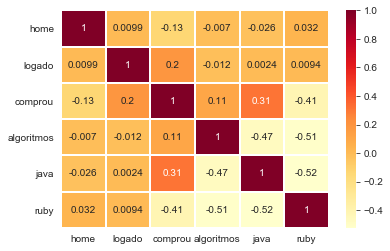

In [17]:
sns.heatmap(corr, cmap= 'YlOrRd', annot= True, linewidths= 1)

**Conclusões**

- Nenhuma variável independente tem forte correlação com outra.
- A variável alvo(comprou) possui uma correlação um mais forte com 'java' e 'logado' em relação as outras, porém essa correlação ainda pode ser considerada como média pra baixa.

### Separando o dataset em Treino e Teste
Para que possamos fazer previsões, precisamos separar o nosso conjunto de dados entre treino e teste.

In [18]:
# Definindo o seed global
seed= 123
np.random.seed(seed)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, stratify= y)

## 5. Construção do modelo de Machine Learning

Após entendermos melhor nossos dados, a realidade da empresa e prepararmos nossos dados, é hora de utilizarmos Machine Learning para fazer previsões que podem nos ajudar a prever a venda ou não dos carros.

Para isso, avaliaremos a accurácia de 6 modelos diferentes de Machine Learning:

>* LogisticRegression
>* RandomForest
>* DecisionTree
>* KNeighbors
>* SVC
>* AdaBoost


### Classificador  'Burro' (Dummy Classifier)

O classificador dummy nada mais é do que um classificador que utiliza regras básicas. Em outras palavras, ele vai usar algum preditor 'burro' como por exemplo predizer que todos os valores serão iguais a zero – ou a um, dependendo de qual for o mais frequente. Serve como uma linha base para classificar se o modelo de Machine Learning teve uma boa acurácia ou não.


### Validação Cruzada(Cross-Validation)

Para o resultado ser fiel a realidade e não ficar refém da sorte de uma aleatóriedade, utilizaremos validação cruzada. Para saber mais como funciona essa técnica, leia [este artigo](https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=A%20valida%C3%A7%C3%A3o%20cruzada%20%C3%A9%20uma,da%20modelagem%20%C3%A9%20a%20predi%C3%A7%C3%A3o.).


Nesse projeto iremos utilizar o KFold com o numero de folders igual a 10.


### Distribuição Normal


Uma das propriedades da distibuição normal é que a média somada com duas vezes o desvio padrão é igual ao percentil 97,5 e a média subtraída de 2 vezes o desvio padrão é igual ao percentil 2,5. Assim, podemos dizer que a média mais ou menos dois desvios padrões é o intervalo que contém 95% dos dados da amostra.

In [19]:
# Classificador Burro
# Vamos utilizar a estratégia de maior frequência
# Nesse caso, 'chutaremos' como se todos os cursos tivessem sido vendidos(1)

dummy= DummyClassifier(strategy= 'most_frequent')
dummy.fit(x_train, y_train)
print('Linha base: {:.2f}%'.format(dummy.score(x_test, y_test)*100))

Linha base: 83.33%


In [20]:
models= []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('KNeighbors', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('AdaBoost', AdaBoostClassifier()))
models

[('LogisticRegression', LogisticRegression()),
 ('RandomForest', RandomForestClassifier()),
 ('DecisionTree', DecisionTreeClassifier()),
 ('KNeighbors', KNeighborsClassifier()),
 ('SVC', SVC()),
 ('AdaBoost', AdaBoostClassifier())]

In [21]:
np.random.seed(seed)

num_folders= 10
scoring= 'accuracy'
results= []
names= []

for name, model in models:
    modelo= model
    kfold= KFold(n_splits= num_folders, shuffle= True)
    cv_results= cross_val_score(estimator= modelo, X= x_train, y= y_train, cv= kfold, scoring= scoring)*100
    results.append(cv_results)
    names.append(name)
    media= cv_results.mean()
    std= cv_results.std()
    print('{:18} : Acurácia média {:.2f}% , Desvio Padrão {:.2f} , Faxa de resultados [{:.2f} - {:.2f}]'.format(
        name, media, std, media-2*std, media+2*std))

LogisticRegression : Acurácia média 84.14% , Desvio Padrão 3.58 , Faxa de resultados [76.98 - 91.31]
RandomForest       : Acurácia média 84.14% , Desvio Padrão 6.01 , Faxa de resultados [72.13 - 96.16]
DecisionTree       : Acurácia média 84.14% , Desvio Padrão 3.86 , Faxa de resultados [76.43 - 91.86]
KNeighbors         : Acurácia média 81.86% , Desvio Padrão 7.17 , Faxa de resultados [67.51 - 96.20]
SVC                : Acurácia média 84.14% , Desvio Padrão 2.96 , Faxa de resultados [78.23 - 90.06]
AdaBoost           : Acurácia média 83.43% , Desvio Padrão 3.63 , Faxa de resultados [76.18 - 90.68]


### Avaliação do resultado

Os resultados dos modelos foram bem próximos ao da nossa linha base (83,33%).
Tivemos 4 modelos com a mesma média de acurácia. ````LogisticRegression, RandomForest, DecisionTree e SVC````

Os modelos ````SVC e LogisticRegression ```` tiveram os menores desvio padrão.

Vamos buscar os melhores parâmetros dos dois modelos acima, para tentar aumentar a acurácia média.

## GridSearchCV

Sendo os dois modelos ````SVC e LogisticRegression ```` como os mais prolíficos, vamos analisar cada um utilizando o GridSearchCV para tentar encontrar os melhores parâmetros.

>* O GridSearchCV é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo, pois ele fará de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto.
Para saber mais, leia [este artigo](https://andersonuyekita.github.io/notebooks/blog/2019/03/21/como-usar-o-gridsearchcv/#:~:text=O%20GridSearchCV%20%C3%A9%20uma%20ferramenta,os%20armazenar%C3%A1%20num%20%C3%BAnico%20objeto.).

### LogisticRegression

Vamos analisar os seguintes parâmetros desse modelo, sendo os valores em negrito os Default:

- C = 0.1, 0.5, **1**, 1.5, 2
- solver = newton-cg, **lbfgs**, liblinear, sag, saga
- max_iter = 25, 50, **100**, 150, 200

In [22]:
# Retirar os warnings no output
warnings.simplefilter("ignore")

np.random.seed(seed)

# Parâmetros
c_values= [0.1, 0.5, 1, 1.5, 2]
solver_values= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter_values= [25, 50, 100, 150, 200]
params_values= dict(C= c_values, solver= solver_values, max_iter= max_iter_values)

modelo= LogisticRegression()
kfold= KFold(n_splits= num_folders, shuffle= True)
grid= GridSearchCV(estimator= modelo, param_grid= params_values, cv= kfold, scoring= scoring)
grid_results= grid.fit(x_train, y_train)
print('Melhor acurácia : {:.2f}% com os parâmetros {}'.format(grid_results.best_score_*100, grid_results.best_params_))

means= grid_results.cv_results_['mean_test_score']*100
stds= grid_results.cv_results_['std_test_score']*100
params= grid_results.cv_results_['params']
for mean, std, param in zip(means,stds,params):
    print('{:.2f}% ({:.2f}%) : {}'.format(mean,std,param))

Melhor acurácia : 84.14% com os parâmetros {'C': 0.5, 'max_iter': 25, 'solver': 'newton-cg'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 25, 'solver': 'newton-cg'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 25, 'solver': 'lbfgs'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 25, 'solver': 'liblinear'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 25, 'solver': 'sag'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 25, 'solver': 'saga'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 50, 'solver': 'newton-cg'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 50, 'solver': 'lbfgs'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 50, 'solver': 'liblinear'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 50, 'solver': 'sag'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 50, 'solver': 'saga'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
83.14% (3.25%) : {'C': 0.1, 'max_iter': 100, 'solver': 'sag'}
83.14

In [23]:
# Utilizando os melhores parâmetros de acordo com o treino nos dados de teste.

modelo= LogisticRegression(C= 0.5, max_iter= 25, solver= 'newton-cg')
modelo.fit(x_train, y_train)
y_prev_logistic= modelo.predict(x_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7600    0.3800    0.5067        50
           1     0.8873    0.9760    0.9295       250

    accuracy                         0.8767       300
   macro avg     0.8236    0.6780    0.7181       300
weighted avg     0.8661    0.8767    0.8590       300

Acurácia: 87.67%



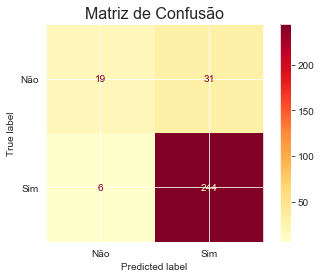

<Figure size 360x360 with 0 Axes>

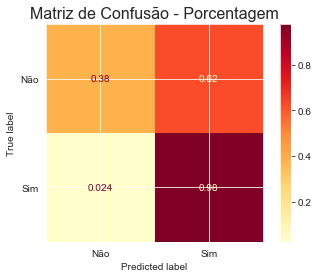

<Figure size 360x360 with 0 Axes>

In [24]:
# Imprimindo o Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_prev_logistic, digits=4))

# Imprimindo a Acurácia
print("Acurácia: {:.2f}%\n".format(accuracy_score(y_test, y_prev_logistic)*100))
 

# Plotando a matrix de confusão
cm= confusion_matrix(y_test, y_prev_logistic)
labels= ['Não', 'Sim']
cmd= ConfusionMatrixDisplay(cm, display_labels= labels)
cmd.plot(cmap= 'YlOrRd')
plt.title('Matriz de Confusão', fontsize= 16)
plt.figure(figsize= (5,5))
plt.show()

# Plotando a matrix de confusão em porcentagem
cm= confusion_matrix(y_test, y_prev_logistic, normalize= 'true')
labels= ['Não', 'Sim']
cmd= ConfusionMatrixDisplay(cm, display_labels= labels)
cmd.plot(cmap= 'YlOrRd')
plt.title('Matriz de Confusão - Porcentagem', fontsize= 16)
plt.figure(figsize= (5,5))
plt.show()

### Insights

- O modelo foi melhor do que o esperado, pois nos treinos a acurácia ficou em 84.14% e no teste 87.67%
- Com a matriz de confusão, conseguimos visualizar que o maior erro no modelo se dá com os falsos positivos, onde a pessoa não compra o curso mas o modelo prevê que sim.

### SVC

In [25]:
np.random.seed(seed)

c_values= [0.1, 0.5, 1, 1.5, 2]
kernel_values= ['linear', 'poly', 'rbf', 'sigmoid']
params_values= dict(C= c_values, kernel= kernel_values)

modelo= SVC()
kfold= KFold(n_splits= num_folders, shuffle= True)
grid= GridSearchCV(estimator= modelo, param_grid= params_values, cv= kfold, scoring= scoring)
grid_results= grid.fit(x_train, y_train)
print('Melhor acurácia : {:.2f}% com os parâmetros {}'.format(grid_results.best_score_*100, grid_results.best_params_))

means= grid_results.cv_results_['mean_test_score']*100
stds= grid_results.cv_results_['std_test_score']*100
params= grid_results.cv_results_['params']
for mean, std, param in zip(means,stds,params):
    print('{:.2f}% ({:.2f}%) : {}'.format(mean,std,param))

Melhor acurácia : 84.14% com os parâmetros {'C': 0.1, 'kernel': 'poly'}
83.14% (3.25%) : {'C': 0.1, 'kernel': 'linear'}
84.14% (3.58%) : {'C': 0.1, 'kernel': 'poly'}
83.14% (3.25%) : {'C': 0.1, 'kernel': 'rbf'}
83.14% (3.25%) : {'C': 0.1, 'kernel': 'sigmoid'}
83.14% (3.25%) : {'C': 0.5, 'kernel': 'linear'}
84.14% (3.58%) : {'C': 0.5, 'kernel': 'poly'}
84.14% (3.58%) : {'C': 0.5, 'kernel': 'rbf'}
80.57% (3.51%) : {'C': 0.5, 'kernel': 'sigmoid'}
83.14% (3.25%) : {'C': 1, 'kernel': 'linear'}
84.14% (3.58%) : {'C': 1, 'kernel': 'poly'}
84.14% (3.58%) : {'C': 1, 'kernel': 'rbf'}
80.43% (3.50%) : {'C': 1, 'kernel': 'sigmoid'}
83.14% (3.25%) : {'C': 1.5, 'kernel': 'linear'}
84.14% (3.58%) : {'C': 1.5, 'kernel': 'poly'}
84.14% (3.58%) : {'C': 1.5, 'kernel': 'rbf'}
80.29% (3.82%) : {'C': 1.5, 'kernel': 'sigmoid'}
82.43% (3.94%) : {'C': 2, 'kernel': 'linear'}
84.14% (3.58%) : {'C': 2, 'kernel': 'poly'}
84.14% (3.58%) : {'C': 2, 'kernel': 'rbf'}
80.43% (3.67%) : {'C': 2, 'kernel': 'sigmoid'}


In [26]:
# Utilizando os melhores parâmetros de acordo com o treino nos dados de teste.

modelo= SVC(C= 0.1, kernel= 'poly')
modelo.fit(x_train, y_train)
y_prev_svc= modelo.predict(x_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7600    0.3800    0.5067        50
           1     0.8873    0.9760    0.9295       250

    accuracy                         0.8767       300
   macro avg     0.8236    0.6780    0.7181       300
weighted avg     0.8661    0.8767    0.8590       300

Acurácia: 87.67%



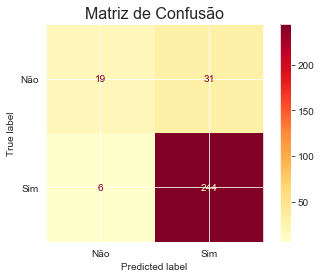

<Figure size 360x360 with 0 Axes>

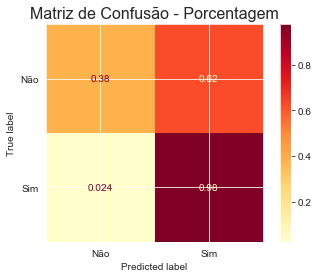

<Figure size 360x360 with 0 Axes>

In [27]:
# imprimindo o Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_prev_svc, digits=4))

# Imprimindo a Acurácia
print("Acurácia: {:.2f}%\n".format(accuracy_score(y_test, y_prev_svc)*100))

# Plotando a matrix de confusão
cm= confusion_matrix(y_test, y_prev_svc)
labels= ['Não', 'Sim']
cmd= ConfusionMatrixDisplay(cm, display_labels= labels)
cmd.plot(cmap= 'YlOrRd')
plt.title('Matriz de Confusão', fontsize= 16)
plt.figure(figsize= (5,5))
plt.show()

# Plotando a matrix de confusão em porcentagem
cm= confusion_matrix(y_test, y_prev_svc, normalize= 'true')
labels= ['Não', 'Sim']
cmd= ConfusionMatrixDisplay(cm, display_labels= labels)
cmd.plot(cmap= 'YlOrRd')
plt.title('Matriz de Confusão - Porcentagem', fontsize= 16)
plt.figure(figsize= (5,5))
plt.show()

### Insights

- O resultado foi igual ao do teste com LogisticRegression.
- O modelo também foi melhor do que o esperado, pois nos treinos a acurácia ficou em 84.14% e no teste 87.67%
- Com a matriz de confusão, conseguimos visualizar que o maior erro no modelo se dá com os falsos negativos, onde a pessoa não compra o curso mas o modelo prevê que sim.

## Conclusão

A maior acurácia conseguida foi de 87,67%. O curioso é que esse resultado aconteceu na hora de comparar os melhores parâmetros dos dois modelos escolhidos nos dados de teste, encontra.

Isso pode ter sido ocasionado pela quantidade de dados não ter sido o suficiente e eles estarem desbalanceados, ou seja, existia muito mais dados de compra(83,2%) do que não compra(16,8%). Lembrando que o dataset desse projeto apresentavam 1000 linhas e 5 colunas.

O indicado é a coleta de mais dados para refazer os testes.